In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [92]:
import os
from utils.DataManager import DataManager as DM
from utils.Similarity import Similarity as SMY

## Preprocessing Data
- Resize to 1024x1024 pixels by keeping aspect ratio
- 400go -> 25go

In [93]:
""" Path to change if needed
"""
# path to the ROL dataset
path_rol = "D:/Dataset" 
# path to the compressed ROL dataset
path_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed" 
# path to the similar ROL dataset
path_sim_rol = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol"
# path to the compressed similar ROL dataset
path_sim_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_compressed" 
# path to the extracted images similar ROL dataset
path_sim_rol_extract = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted"
# path to the extracted images similar ROL dataset
path_sim_rol_extract_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_compressed"


- Resize each image of '/rol' by preserving the aspect ratio to 1024x1024 pixels

In [94]:
if os.path.exists(path_sim_rol_comp):
    print("[INFO] Data already compressed")
else:
    print("[INFO] Compressing data")
    DM.read_and_compress_files(path_sim_rol, path_sim_rol_comp, max_workers=4, single_folder=True)  

[INFO] Data already compressed


In [95]:
if os.path.exists(path_rol_comp):
    print("[INFO] Data already compressed")
else:
    print("[INFO] Compressing data")
    DM.read_and_compress_files(path_rol, path_rol_comp, max_workers=4, single_folder=False)

[INFO] Data already compressed


- Extract images from each images in '/similaire_rol'

In [96]:
if os.path.exists(path_sim_rol_extract):
    print("[INFO] Images already extracted")
else: 
    DM.extract_images(path_sim_rol, path_sim_rol_extract)


[INFO] Images already extracted


- Resize each extracted images by preserving the aspect ratio

In [97]:
if os.path.exists(path_sim_rol_extract_comp):
    print("[INFO] Data already compressed")
else:
    print("[INFO] Compressing data")
    DM.read_and_compress_files(path_sim_rol_extract, path_sim_rol_extract_comp, max_workers=4, single_folder=True)

[INFO] Data already compressed


## Matching rol and similaire_rol images by using SIFT

In [98]:
# SMY.match_images_with_sift(path_rol_comp, path_sim_rol_extract_comp)

In [99]:
# SMY.match_images_with_mse(path_rol_comp, path_sim_rol_extract_comp,max_images=10)

c:\Users\halim\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\halim\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Extracting features for rol images...
Extracting features for sim images...
Computing nearest neighbors...


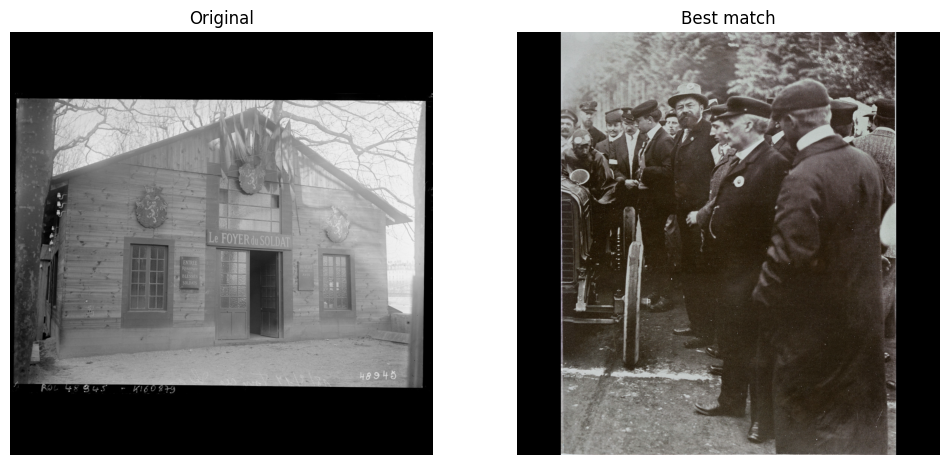

In [100]:
matches, features_rol, features_sim_rol = SMY.match_images_with_nn(path_rol_comp, path_sim_rol_extract_comp, max_images=1, plot=True)